# I Solving the Sum of Two Digits Programming Challenge

## C++

In [ ]:
%%writefile sum.cpp
#include <iostream>

int sum_of_two_digits(int first_digit, int second_digit) {
    return first_digit + second_digit;
}

int main() {
    int a = 0;
    int b = 0;
    std::cin >> a;
    std::cin >> b;
    std::cout << sum_of_two_digits(a, b);
    return 0;
}

Overwriting sum.cpp


In [ ]:
!g++ sum.cpp -o sum
!./sum

2
3
5

### Test input output files

In [ ]:
%%writefile input1.txt
4 8

Writing input1.txt


In [ ]:
%%writefile output1.txt
12

Overwriting output1.txt


In [ ]:
%%writefile input2.txt
-5 9

Writing input2.txt


In [ ]:
%%writefile output2.txt
4

Writing output2.txt


In [ ]:
!./sum < input1.txt

12

In [ ]:
!./sum < input2.txt

4

### Comparing files with grep

https://askubuntu.com/questions/546796/comparing-two-text-files

In [ ]:
!grep -xvFf output1.txt output1.txt 

In [ ]:
!grep -xvFf output1.txt output2.txt 

4


In [ ]:
!grep -xvFf output2.txt output1.txt 

12


In [ ]:
!./sum < input1.txt> ctest1.txt
!grep -xvFf output1.txt ctest1.txt

In [ ]:
!./sum < input2.txt > ctest2.txt
!grep -xvFf output2.txt ctest2.txt

## Python

In [ ]:
%%writefile sum.py
# python3


def sum_of_two_digits(first_digit, second_digit):
    return first_digit + second_digit

if __name__ == '__main__':
    a, b = map(int, input().split())
    print(sum_of_two_digits(a, b))

Overwriting sum.py


In [ ]:
!python sum.py

4 5
9


In [ ]:
!python sum.py  < input1.txt> ptest1.txt
!grep -xvFf output1.txt ptest1.txt

In [ ]:
!python sum.py  < input2.txt> ptest2.txt
!grep -xvFf output2.txt ptest2.txt

# II Solving The Maximum Pairwise Product Programming Challenge in C++

## C++

In [ ]:
%%writefile max_pairwise_product1.cpp
#include <iostream>
#include <vector>
#include <algorithm>

int MaxPairwiseProduct(const std::vector<int>& numbers) {
    int max_product = 0;
    int n = numbers.size();

    for (int first = 0; first < n; ++first) {
        for (int second = first + 1; second < n; ++second) {
            max_product = std::max(max_product,
                numbers[first] * numbers[second]);
        }
    }

    return max_product;
}

int main() {
    int n;
    std::cin >> n;
    std::vector<int> numbers(n);
    for (int i = 0; i < n; ++i) {
        std::cin >> numbers[i];
    }

    std::cout << MaxPairwiseProduct(numbers) << "\n";
    return 0;
}


Writing max_pairwise_product1.cpp


In [ ]:
!g++ max_pairwise_product1.cpp -o max_pairwise_product1
!./max_pairwise_product1

2
100000 90000
410065408


### Test 1: lagest input numbers 200000 200000 in the input

In [ ]:
%%writefile input1.txt
5
1 3 200000 9 200000 23

Overwriting input1.txt


In [ ]:
!./max_pairwise_product1 < input1.txt

1345294336


In [ ]:
%%writefile max_pairwise_product2.cpp
#include <iostream>
#include <vector>
#include <algorithm>

long long MaxPairwiseProduct(const std::vector<int>& numbers) {
    long long max_product = 0LL;
	  long long aux_product = 0LL;
    int n = numbers.size();

    for (int first = 0; first < n; ++first) {
        for (int second = first + 1; second < n; ++second) {
			       aux_product =  (long long) numbers[first] * numbers[second];
            if ( max_product < aux_product)  {
				        max_product = aux_product;
             }
        }
    }

    return max_product;
}

int main() {
    int n;
    std::cin >> n;
    std::vector<int> numbers(n);
    for (int i = 0; i < n; ++i) {
        std::cin >> numbers[i];
    }

    std::cout << MaxPairwiseProduct(numbers) << "\n";
    return 0;
}


Writing max_pairwise_product2.cpp


In [ ]:
!g++ max_pairwise_product2.cpp -o max_pairwise_product2
!./max_pairwise_product2 < input1.txt

40000000000


### Test 2  generate a tests file with the maximun n 200000 numbres and measure time

In [ ]:
%%writefile generate_Test1.cpp

#include <cstdlib>
#include <iostream>
#include <vector>
#include <stdio.h>

FILE *outfile;
int main() {

    int n = 200000;

    outfile = fopen("Test1.txt", "w");

    fprintf(outfile, "%d\n", n);

    for (int i=0; i<n; i++) {
        fprintf(outfile, "%d ", rand());
    }
    return 0;
}

Writing generate_Test1.cpp


In [ ]:
%%time
!g++ generate_Test1.cpp -o genst
!./genst

CPU times: user 4.73 ms, sys: 12.6 ms, total: 17.3 ms
Wall time: 1.23 s


In [ ]:
%%time
!g++ max_pairwise_product2.cpp -o max_pairwise_product2
!./max_pairwise_product2 < Test1.txt

4611630033697999785
CPU times: user 699 ms, sys: 93.2 ms, total: 792 ms
Wall time: 2min 1s


### Efficient solution 

In [ ]:
%%writefile max_pairwise_product_efficient.cpp
#include <iostream>
#include <vector>
#include <algorithm>

long MaxPairwiseProduct(const std::vector<int> &numbers)
	{
		long first = 0, second = 0;
		for (int i = 0; i < numbers.size(); i++)
		{
			if (numbers[i] > first)
			{
				second = first;
				first = numbers[i];
			}
			else if (numbers[i] > second)
			{
				second = numbers[i];
			}
		}
		return first*second;
	}
	

int main() {
    int n;
    std::cin >> n;
    std::vector<int> numbers(n);
    for (int i = 0; i < n; ++i) {
        std::cin >> numbers[i];
    }

    std::cout << MaxPairwiseProduct(numbers) << "\n";
    return 0;
}

Overwriting max_pairwise_product_efficient.cpp


Stress tests 

In [ ]:
%%writefile StressTest1.cpp

#include <cstdlib>
#include <iostream>
#include <vector>
#include <stdio.h>

using std::vector;
using std::cout;

FILE *outfile;
vector <int> a;

long long MaxPairwiseProduct(const std::vector<int>& numbers) {
    long long max_product = 0LL;
	  long long aux_product = 0LL;
    int n = numbers.size();

    for (int first = 0; first < n; ++first) {
        for (int second = first + 1; second < n; ++second) {
			       aux_product =  (long long) numbers[first] * numbers[second];
            if ( max_product < aux_product)  {
				        max_product = aux_product;
             }
        }
    }

    return max_product;
}

long long MaxPairwiseProductFast(const std::vector<int>& numbers) {
       
		long long first = 0LL, 
    long long second = 0LL;
		for (int i = 0; i < numbers.size(); i++)
		{
			if (numbers[i] > first)
			{
				second = first;
				first = numbers[i];
			}
			else if (numbers[i] > second)
			{
				second = numbers[i];
			}
		}
		return first*second;
	}


int main() {

    while (true) {

        int n = rand() % 10 + 2;
        cout << n << "\n";
        vector <int> a;

        for (int i=0; i<n; i++) {
            a.push_back(rand() % 10000);
        }

        for (int i=0; i<n; i++) {
            cout << a[i] << " ";
        }

        cout << "\n";

        long long res1 = MaxPairwiseProduct(a);
        long long res2 = MaxPairwiseProductFast(a);

        if (res1 != res2) {
            cout << "Wrong answer: " << res1 << " " << res2 << "\n";
            break;
        }
        else {
            cout << "OK\n";
        }

    }


}

Overwriting StressTest1.cpp


In [ ]:
!g++ StressTest1.cpp -o StressTest1
!./StressTest1

Streaming output truncated to the last 5000 lines.
3
9484 6360 4840 
OK
8
5505 3061 3960 1405 9416 3836 9224 9342 
OK
10
9203 1482 4756 967 2816 6431 5131 1931 7986 6796 
OK
10
2975 667 4264 2068 3419 6865 6870 2903 3225 8062 
OK
4
5082 1123 8212 2840 
OK
11
8400 8416 6233 6888 7619 7715 7997 4938 532 780 69 
OK
5
8766 6866 5714 8093 3885 
OK
10
6514 3657 3195 9736 2912 6420 7798 7164 7855 8921 
OK
11
7047 5813 129 5463 2046 3370 9434 6114 7719 724 6646 
OK
11
7145 5461 3617 363 1175 1711 601 7506 8225 4258 701 
OK
3
7170 3474 5759 
OK
9
1329 1032 8768 4728 3197 5249 6543 5244 8619 
OK
11
1358 6338 3053 4356 1189 6550 6169 4807 6914 3697 2870 
OK
7
1203 1095 8125 8256 5408 1647 1730 
OK
11
2334 9411 4903 7454 4139 8101 2704 682 3345 7675 3011 
OK
7
366 2416 1763 1555 8967 7932 6362 
OK
5
7981 9232 9748 5536 6679 
OK
7
3793 8439 5872 5523 2310 4559 1287 
OK
6
2013 1778 5315 4717 8813 5012 
OK
7
8176 2419 9111 593 4182 666 5912 
OK
8
3381 8145 6448 8965 4245 1984 1997 8470 
OK
11
6788 43

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Streaming output truncated to the last 5000 lines.
10
4940 5776 7145 9790 438 4177 6232 1019 934 447 
OK
5
7772 3885 1809 4127 6950 
OK
5
9186 2023 644 7364 2131 
OK
9
569 9840 7317 7138 3565 8675 1352 3753 3615 
OK
10
7250 9758 3919 1427 5990 4938 2361 6437 8331 6486 
OK
6
6493 613 3624 6306 6152 2000 
OK
2
9868 4131 
OK
2
437 323 
OK
11
3928 3888 984 5280 3993 952 8761 1243 7062 2680 2670 
OK
4
7618 1384 5841 2302 
OK
2
2515 8795 
OK
7
6139 5101 7339 8139 8404 7207 8623 
OK
8
3997 5298 5705 7925 5539 3041 9557 9532 
OK
7
8318 7128 7407 7350 6150 6811 1321 
OK
6
2652 3623 1756 1519 8770 2944 
OK
11
223 283 2150 4979 3843 7125 8375 4192 2424 432 2117 
OK
5
9826 8026 3847 171 6345 
OK
7
7579 3695 7126 742 5016 1012 3395 
OK
3
9121 4914 3761 
OK
7
8925 3985 8700 7428 5316 8895 905 
OK
4
3087 9681 476 1556 
OK
8
302 9583 7844 474 2280 5171 4405 5975 
OK
9
5147 7344 9662 4894 8687 8783 6161 8801 7200 
OK
8
2786 5900 8866 8102 4796 6124 8146 4235 
OK
7
4975 5792 9802 5277 5375 3998 2103 
OK

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Streaming output truncated to the last 5000 lines.
3
6530 496 257 
OK
9
7597 5485 4296 4308 2249 5346 3666 8884 1030 
OK
4
6028 9206 5144 2533 
OK
8
6942 712 9136 6023 2478 9382 344 6729 
OK
4
8657 1512 3363 1539 
OK
10
9973 7556 5958 5458 8204 6618 4059 9902 284 2943 
OK
4
5206 5323 138 6703 
OK
8
4916 9997 4921 4053 6020 7399 3435 6364 
OK
2
5528 1373 
OK
4
5243 2912 353 5216 
OK
3
6311 7026 1377 
OK
11
1085 1280 9565 380 2212 1124 5703 2351 4179 9912 7267 
OK
8
4833 1320 196 8584 1108 2912 9065 6636 
OK
10
1057 1879 9902 7762 3448 6723 4073 474 4453 3354 
OK
4
5733 2920 8292 7945 
OK
6
348 6648 8223 260 268 8751 
OK
5
1588 5299 3677 9048 8211 
OK
6
5684 5201 152 3916 5104 4266 
OK
6
8179 8340 4190 2632 1694 2102 
OK
7
966 6747 2663 5010 7095 9311 9585 
OK
7
5931 8336 2448 3872 3635 2477 2920 
OK
11
1572 8605 3400 8076 8873 8504 2342 2589 3036 7034 6779 
OK
2
5081 5234 
OK
10
6047 1981 9401 1058 5428 5064 6995 2783 996 5332 
OK
5
4868 5319 412 7788 3518 
OK
8
2745 6919 6412 1618 1775

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Streaming output truncated to the last 5000 lines.
6
4407 3023 6525 5527 158 3371 
OK
9
8562 7742 7687 3069 1017 4146 3673 415 9963 
OK
10
7532 8013 9567 3384 663 6531 3511 2308 8810 7819 
OK
10
7705 9665 7172 8464 2689 49 3991 2847 9773 1210 
OK
3
7515 8898 830 
OK
6
3044 856 1652 9359 4136 9184 
OK
6
55 8921 4388 6586 8784 3048 
OK
8
6603 6206 9453 2621 9730 4269 5310 6132 
OK
5
4509 5905 5823 8622 3420 
OK
5
5805 4656 469 6661 6308 
OK
11
7149 1845 3553 7205 7118 4293 143 5902 7342 5540 8858 
OK
2
1345 1479 
OK
5
5615 3141 2115 228 4002 
OK
2
2403 2624 
OK
4
3477 8429 8800 3946 
OK
4
5109 127 4944 3306 
OK
3
8501 6776 7974 
OK
6
9030 1668 4184 7888 1569 1882 
OK
9
3904 3849 8860 6019 4077 2862 4039 2832 1839 
OK
5
6309 6620 6983 6608 4415 
OK
6
6735 9359 1750 6768 7860 4878 
OK
7
6504 3909 2763 7041 1797 684 8923 
OK
9
4588 2772 6377 607 3201 5592 998 6033 7431 
OK
3
8695 4051 6165 
OK
7
4818 4609 8390 4177 2712 1511 8389 
OK
2
2606 4894 
OK
11
1721 8287 9649 2406 7210 7166 6994 633

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Streaming output truncated to the last 5000 lines.
6
8450 3393 9173 183 7749 7214 
OK
10
3073 8979 8379 9808 6826 7106 7945 6070 579 5956 
OK
7
4367 2734 4251 9816 6998 4875 8072 
OK
9
1199 8616 1422 5765 6070 6224 9159 5243 6407 
OK
2
2457 3676 
OK
5
7789 2055 6141 4615 9161 
OK
8
7037 6093 42 742 6812 9128 1345 6628 
OK
11
6221 4700 2558 3772 3316 332 9537 5738 6556 8696 7334 
OK
6
1956 6143 2992 8289 3932 1399 
OK
4
4899 6912 1220 1936 
OK
7
1262 9031 9818 6743 376 2798 5574 
OK
11
3851 8132 6721 3519 8465 2611 9258 1373 1307 2944 4337 
OK
8
9087 3681 7905 3020 5080 5040 4271 1993 
OK
2
2560 1350 
OK
7
1591 7520 618 8319 319 2544 1269 
OK
4
7028 4342 4041 1845 
OK
5
9651 3219 4613 2595 3908 
OK
11
1683 7590 2134 1055 9022 3526 1678 1015 9787 4238 8718 
OK
4
5829 6238 632 501 
OK
11
3176 8122 3431 6556 2464 3825 8402 5770 9828 1621 383 
OK
6
1881 4612 459 5823 3098 7866 
OK
8
6625 9544 2213 6412 3783 931 6426 5964 
OK
4
7058 2817 6431 6586 
OK
11
6215 9494 3404 40 7896 5526 9868 5869

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Streaming output truncated to the last 5000 lines.
OK
11
3982 7306 1863 3927 4901 8110 8635 2809 7366 5314 6258 
OK
4
5132 1710 2758 1844 
OK
11
777 1932 7761 1746 2 2777 2666 2175 2421 9114 971 
OK
11
1825 3833 4193 9132 5696 4472 4033 3807 9459 3194 7525 
OK
7
5804 358 6258 3867 9468 4454 8098 
OK
9
2738 2211 8344 2740 4988 7362 1267 7410 6476 
OK
11
7621 4654 2424 8167 138 8120 8991 523 8279 8451 70 
OK
9
9576 5874 2515 2186 9741 8335 2992 4191 4932 
OK
2
6402 3276 
OK
4
1391 6990 6090 5153 
OK
11
4681 9126 4473 7105 7293 963 5225 6285 1486 9857 1088 
OK
8
2014 7016 3783 881 9203 9876 9216 2195 
OK
10
500 7926 470 129 2748 1861 7119 5190 3366 6938 
OK
3
2493 1411 3328 
OK
10
8726 4906 8775 213 4763 9863 8121 6777 6880 1904 
OK
2
2435 8133 
OK
8
4630 2201 3726 8908 2671 3855 8009 885 
OK
9
3199 603 4265 9423 3096 2029 2751 5587 755 
OK
9
4362 7320 8772 578 5442 1901 3810 3698 5911 
OK
7
1831 9137 7227 4032 9216 6136 3056 
OK
5
497 293 6750 3696 896 
OK
10
9471 345 9397 2223 2284 152 

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Streaming output truncated to the last 5000 lines.
5
8701 250 2644 5300 6165 
OK
10
3685 5746 5280 3506 9933 1743 39 98 3789 8593 
OK
4
3605 1188 9499 4650 
OK
8
2859 9076 5927 9558 4592 6240 8519 4874 
OK
5
7221 1476 4160 8873 7641 
OK
10
8910 9740 980 2416 6025 9075 8807 6123 2864 7400 
OK
9
6469 4941 3106 7472 9117 2317 2900 1397 1876 
OK
4
7637 395 8718 9152 
OK
10
6546 9664 9193 4188 5364 8103 280 6344 6871 6305 
OK
11
5679 8780 8283 9431 2388 1105 4372 1846 8577 3490 4164 
OK
9
1239 2392 5321 8876 9139 391 4380 9460 6937 
OK
9
8653 7477 5761 3109 7757 2106 9980 414 3877 
OK
3
9195 8513 1443 
OK
5
5970 2167 3429 4547 5657 
OK
7
2376 6896 6337 4049 2124 1829 792 
OK
9
1289 7729 3254 9942 1559 9015 9403 9316 7473 
OK
6
9731 1351 7747 5278 9864 5542 
OK
5
2186 7710 2994 6733 9719 
OK
2
5461 2968 
OK
11
5862 5092 1458 6654 4301 2747 735 3907 9042 2294 2923 
OK
7
1611 6748 4181 7694 8099 1929 9324 
OK
7
7471 2537 6501 1533 5531 9586 1253 
OK
5
1399 4221 8453 7261 5665 
OK
5
267 9967 53

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Streaming output truncated to the last 5000 lines.
2
3461 6052 
OK
2
9936 5429 
OK
5
6432 5958 7281 6615 162 
OK
3
7556 2754 2275 
OK
7
4389 9157 2886 3126 7385 2186 9912 
OK
7
9928 3613 2460 1254 6766 7771 3286 
OK
11
175 3237 2867 1956 7202 9299 7914 4483 2266 4428 1915 
OK
7
7182 542 4790 7923 9699 4029 7401 
OK
7
6215 3665 7312 6143 7279 6125 7397 
OK
9
248 684 6976 423 273 9843 2379 7475 5494 
OK
7
8310 7760 1073 225 3935 4607 7120 
OK
10
8882 6819 9107 6283 256 5322 9949 3921 1466 3580 
OK
10
5215 3977 6646 2251 953 3421 2524 796 2152 6351 
OK
2
5149 1014 
OK
4
2574 7591 4338 7181 
OK
3
5768 6063 7883 
OK
7
8698 4491 197 8647 8412 8015 2227 
OK
4
9583 6204 7808 1834 
OK
11
7581 711 4305 6085 3414 6947 1234 4428 7350 3808 2020 
OK
2
7341 6731 
OK
10
9756 4614 8683 8455 9106 5232 3454 3870 3248 2034 
OK
5
9183 4590 9193 1017 8100 
OK
7
8080 8757 2860 1495 5705 447 5923 
OK
7
607 4295 1095 4301 1027 1255 4057 
OK
5
9938 8864 7451 5170 8671 
OK
4
4770 705 6355 3953 
OK
7
5548 1323 97

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Streaming output truncated to the last 5000 lines.
6698 4422 6587 8 9191 
OK
11
1400 1169 2735 1241 5866 6633 2483 4098 8568 1287 3312 
OK
10
4821 5871 3143 3194 86 3393 9056 4719 7047 2996 
OK
2
133 8911 
OK
3
4555 1851 8631 
OK
10
7520 32 7619 6607 7625 9837 9592 109 3936 8160 
OK
10
3600 9760 2570 5824 2903 2116 5910 2649 1172 629 
OK
10
521 6202 6181 9432 4825 7088 1283 3456 7186 5155 
OK
2
1158 1762 
OK
10
7347 1355 3927 7635 5867 8027 1236 1980 597 7060 
OK
5
2713 2970 3884 238 9952 
OK
5
7111 6154 2466 6543 979 
OK
7
4179 787 3093 5686 6980 4251 3801 
OK
10
7951 1508 1077 5586 3727 9104 6822 5707 6054 3882 
OK
5
5119 3205 827 5357 3157 
OK
4
2468 9311 9579 5364 
OK
4
9134 5895 3781 8579 
OK
5
7113 9183 1734 7911 7134 
OK
4
5340 2720 6970 797 
OK
5
2677 6851 9777 9620 8322 
OK
4
6800 3680 6139 264 
OK
2
1802 9843 
OK
8
8444 5329 111 8578 3909 4397 5691 3092 
OK
3
9955 6578 5726 
OK
7
9298 9048 6092 8841 1725 9295 8619 
OK
10
3970 7953 850 7650 4093 1114 6502 2247 7310 7071 
OK
4


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Streaming output truncated to the last 5000 lines.
8
1807 4097 5975 9043 2657 3746 2033 5598 
OK
4
5545 5160 4518 2464 
OK
10
4816 4556 6017 2373 6965 7944 5611 5632 5763 9821 
OK
4
3088 730 1955 907 
OK
3
5681 9066 200 
OK
11
4461 9209 8107 2846 4807 409 8392 6319 4927 7208 2109 
OK
5
1764 8126 8468 8729 2422 
OK
11
714 8186 3901 8878 1274 983 833 8533 735 6514 3952 
OK
7
4523 8413 6497 2630 7612 7656 9392 
OK
6
328 4319 3212 2437 415 1328 
OK
8
8883 6409 9338 9315 7123 7524 9568 6001 
OK
10
551 6834 7332 7638 9701 7636 4926 576 2401 1423 
OK
11
13 9079 8951 2369 5759 3270 5581 8197 37 3261 5113 
OK
3
9671 803 4588 
OK
6
8328 4156 9148 3478 1059 2334 
OK
4
8698 2035 4798 3624 
OK
6
7200 1399 8523 7213 6830 7474 
OK
7
2590 7096 7868 787 7134 1130 2252 
OK
9
801 9407 6995 3947 4087 7503 9447 7566 4914 
OK
4
1080 3612 169 2231 
OK
10
9133 9431 4987 7656 2996 8170 1482 8931 760 8579 
OK
2
7899 5713 
OK
4
151 4472 5083 9558 
OK
11
5382 9998 5322 4830 3916 236 2964 4996 201 3133 7227 
OK
3


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Streaming output truncated to the last 5000 lines.
5399 312 7649 
OK
3
4802 654 8245 
OK
9
6802 7113 9610 3124 4953 5192 1642 5531 4914 
OK
5
6953 3854 2819 5368 8451 
OK
3
6699 9755 5041 
OK
11
2866 2165 3891 8265 2477 7892 9746 3632 8547 4343 6709 
OK
3
7808 2672 4826 
OK
5
4216 2820 4644 9130 6733 
OK
11
9336 9553 3318 7788 4216 6369 7543 9257 7929 6761 7775 
OK
4
5027 252 6064 1125 
OK
6
4611 1821 6946 6313 5981 5970 
OK
3
5095 186 6663 
OK
11
9316 3396 4041 8652 9301 3711 2792 3517 80 6688 9127 
OK
11
3449 6902 6181 4828 3506 2246 2306 7391 3209 4127 689 
OK
4
108 6659 3365 1555 
OK
7
28 1295 2513 9777 1688 7517 9078 
OK
11
6662 8948 5479 3350 4427 9841 6799 7681 6022 1628 1187 
OK
2
286 4930 
OK
2
4413 5619 
OK
6
873 8630 7070 2429 5475 3450 
OK
8
4340 3227 1764 1858 8658 3515 8520 3958 
OK
6
8222 8385 5187 5021 6066 1210 
OK
3
7253 2182 3287 
OK
6
12 4052 4155 69 1278 2786 
OK
3
59 4613 6941 
OK
7
8954 169 8251 7164 5179 1766 2036 
OK
9
7112 6610 3874 2300 7983 9940 9862 985 354

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Streaming output truncated to the last 5000 lines.
OK
11
1419 3925 7856 5914 7213 3896 2522 4611 946 6261 3682 
OK
10
7400 2071 7135 9500 6173 1598 6001 3935 1745 7658 
OK
6
9401 6399 4781 5730 330 6908 
OK
5
8512 8327 1538 6368 593 
OK
5
264 3116 9715 7563 9377 
OK
9
5673 3129 1820 9160 8981 4345 758 1334 8280 
OK
7
8993 5674 4609 1744 455 339 8427 
OK
7
4304 6939 2043 2195 9659 8988 7298 
OK
8
2104 7013 3839 7833 6762 5864 7314 8582 
OK
8
2647 2928 2135 3982 7560 7342 9327 3235 
OK
5
1071 42 8643 9498 3758 
OK
9
6437 2153 5142 2449 1141 8793 8725 9598 5806 
OK
6
3783 2569 4780 1098 7503 6156 
OK
9
431 4643 4079 7992 8338 3406 7579 6641 4478 
OK
3
5284 328 7731 
OK
6
3118 9884 6078 5567 1026 4871 
OK
4
624 7030 3208 4407 
OK
11
7988 1857 3454 496 8307 3886 1492 2386 8230 9830 2145 
OK
11
6471 2975 9782 8108 3303 7514 9044 6421 7398 1474 8340 
OK
8
6346 2632 5400 9728 5840 6160 5679 180 
OK
11
9133 7029 2676 9371 8521 1415 7601 8351 3560 9762 1174 
OK
7
5897 5634 6190 3411 4678 8964 71

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Streaming output truncated to the last 5000 lines.
1981 1193 5631 6656 6663 3077 
OK
9
6396 9868 3498 6239 6311 6907 5923 6314 4380 
OK
3
7609 4923 4967 
OK
10
828 7069 5044 410 5649 4110 9891 246 7794 2656 
OK
11
5339 4639 1588 2002 7716 1627 8398 7585 5126 989 3896 
OK
5
3264 6562 2766 9117 523 
OK
3
436 8034 4869 
OK
7
3078 1632 3154 7188 1523 9753 1334 
OK
11
8332 3025 8819 6272 5027 6535 7900 9777 472 3026 7118 
OK
2
1411 382 
OK
7
529 5851 510 4571 6287 8544 5792 
OK
6
7975 7424 9651 5163 8948 9404 
OK
2
9479 4088 
OK
7
8298 361 7255 1186 8261 7032 8010 
OK
11
503 5083 5402 7237 8718 5932 3089 9228 6855 5728 4125 
OK
9
5873 2100 72 5524 3615 5372 1280 2817 4851 
OK
2
5045 3150 
OK
3
2300 688 6694 
OK
6
8698 4333 6187 3781 6088 3425 
OK
3
8372 6514 4432 
OK
9
8594 4909 4226 819 7009 4298 2695 6976 9670 
OK
7
6146 874 5696 1191 376 4129 3491 
OK
6
7176 9175 6114 1509 1715 6248 
OK
11
5140 5099 2321 8006 5883 7548 6600 792 1775 7420 4153 
OK
7
115 1130 8448 443 3628 9322 2491 
OK
11

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Streaming output truncated to the last 5000 lines.
7
9214 4415 2396 3104 5740 6364 9790 
OK
10
106 5670 2738 2899 5449 9466 2155 8751 653 9220 
OK
4
1525 1624 5824 6639 
OK
6
6827 5143 8776 3460 8757 5634 
OK
8
4323 6401 8474 7428 2141 4838 7218 172 
OK
8
2888 2910 547 4690 2376 9055 9793 9382 
OK
7
6865 907 9899 2689 3898 9126 5869 
OK
3
4254 9329 4151 
OK
10
5407 8474 2641 3881 2254 1134 5071 9472 1306 2720 
OK
5
4217 3267 3403 2945 2322 
OK
10
2327 6949 6414 9586 6849 5455 9837 2327 1324 5230 
OK
3
654 9381 2821 
OK
3
4208 5462 6295 
OK
4
6596 1366 2287 7903 
OK
8
1000 8472 3706 755 1417 6028 303 97 
OK
10
3069 6035 6179 4877 5872 4858 6201 1103 1439 3207 
OK
6
4260 5621 1044 6074 1916 3859 
OK
2
9634 6146 
OK
7
3721 3498 5397 7427 4253 3167 9807 
OK
10
3264 9137 330 9299 1668 5207 5172 6526 7760 6275 
OK
9
7320 3111 4929 2941 508 1003 1209 4367 26 
OK
5
513 3303 916 4011 8701 
OK
7
4616 8220 855 5524 1484 6344 2206 
OK
7
4365 7413 8659 891 5174 4934 1561 
OK
8
4398 6490 1787 4906 3

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Se truncaron las últimas líneas 5000 del resultado de transmisión.
8234 4081 8833 6960 3958 5543 3298 3786 1094 
OK
3
9365 1526 2788 
OK
7
7156 9953 8064 159 6253 3366 735 
OK
11
9974 4614 1684 1567 8328 6828 7516 1716 3287 5750 5797 
OK
4
9062 9756 4015 2361 
OK
6
1461 52 9259 9340 9192 3884 
OK
8
9145 8301 6655 5399 8019 7391 6040 7993 
OK
9
4077 9560 6685 7257 7076 4754 544 9178 551 
OK
8
8241 6659 3032 602 6553 845 7006 2165 
OK
7
6199 2401 6681 1696 702 3337 3447 
OK
3
7080 9488 3067 
OK
11
9917 2627 4826 7174 6056 9580 7718 5234 6484 6734 9827 
OK
5
6118 6781 6049 3316 3788 
OK
8
3501 6339 6967 183 4387 7670 9872 7835 
OK
5
3304 3675 5810 5093 9944 
OK
2
9919 7118 
OK
8
5852 1188 2432 2336 4274 8612 1831 393 
OK
5
4232 3709 5533 8798 3562 
OK
6
5766 97 2612 9788 9969 6799 
OK
3
9625 474 4694 
OK
2
6770 9484 
OK
4
3888 6682 3194 5076 
OK
6
5530 9350 7726 3713 6095 9472 
OK
8
6156 5005 6744 9719 9582 8862 6168 2194 
OK
2
2490 8993 
OK
6
2115 5819 2228 3186 2589 8064 
OK
10
2829 474

Measure with test file of the maximun n 200000 numbres 

In [ ]:
%%time
!g++ max_pairwise_product_efficient.cpp -o max_pairwise_productE
!./max_pairwise_productE < Test1.txt

4611630033697999785
CPU times: user 10.1 ms, sys: 11.2 ms, total: 21.3 ms
Wall time: 629 ms


In [ ]:
%%time
!g++ max_pairwise_product_efficient2.cpp -o max_pairwise_productE2
!./max_pairwise_productE2 < Test1.txt

783375455177562810
CPU times: user 14 ms, sys: 8.15 ms, total: 22.2 ms
Wall time: 628 ms


## Python

In [ ]:
%%writefile max_pairwise_productp.py

def max_pairwise_product(numbers):
    n = len(numbers)
    max_product = 0
    for first in range(n):
        for second in range(first + 1, n):
            max_product = max(max_product,
                numbers[first] * numbers[second])

    return max_product


if __name__ == '__main__':
    input_n = int(input())
    input_numbers = [int(x) for x in input().split()]
    print(max_pairwise_product(input_numbers))

Writing max_pairwise_productp.py


In [ ]:
!python max_pairwise_productp.py

3
4 5 6
30


#Test 1: lagest input numbers 200000 200000 in the input

In [ ]:
%%writefile in1.txt
9
13 36 124 200000 9 200000 23 1992 23443

Overwriting in1.txt


In [ ]:
!python max_pairwise_productp.py < in1.txt

40000000000


##Efficient solution

In [ ]:
%%writefile max_pairwise_productE.py
def max_pairwise_product(numbers):
    n = len(numbers)
    first = 0 
    second = 0
    for i in range(n):
        if numbers[i] > first:
			      second = first
			      first = numbers[i]
        elif numbers[i] > second:
				      second = numbers[i]
              
    return (first * second)


if __name__ == '__main__':
    input_n = int(input())
    input_numbers = [int(x) for x in input().split()]
    print(max_pairwise_product(input_numbers))

Writing max_pairwise_productE.py


### Test   generate a tests file with the maximun n 200000 numbres and measure time

In [ ]:
%%time
!python max_pairwise_productE.py < Test1.txt

4611630033697999785
CPU times: user 9.5 ms, sys: 14.1 ms, total: 23.6 ms
Wall time: 242 ms


Stress Tests

In [ ]:
from random import randint

def max_pairwise_product(numbers):
    n = len(numbers)
    max_product = 0
    for first in range(n):
        for second in range(first + 1, n):
            max_product = max(max_product,
                numbers[first] * numbers[second])
    
    return max_product

def max_pairwise_productEf(numbers):
    n = len(numbers)
    first = 0 
    second = 0
    for i in range(n):
        if numbers[i] > first:
			      second = first
			      first = numbers[i]
        elif numbers[i] > second:
				      second = numbers[i]
              
    return (first * second)

if __name__ == "__main__":

    while True:
        n = randint(2, 20000)
        print(n)
        a = []

        for i in range(n):
          a.append(randint(0, 10000))

        for i in range(n):
          print(a[i], end=" ")

        print("")

        res1 = max_pairwise_product(a)
        res2 = max_pairwise_productEf(a)

        if res1 != res2:
            print("Wrong answer:", res1, res2)
            break
        else:
            print("OK\n")



```
# Tiene formato de código
```

Submit Weel 1 - Sum of two numbers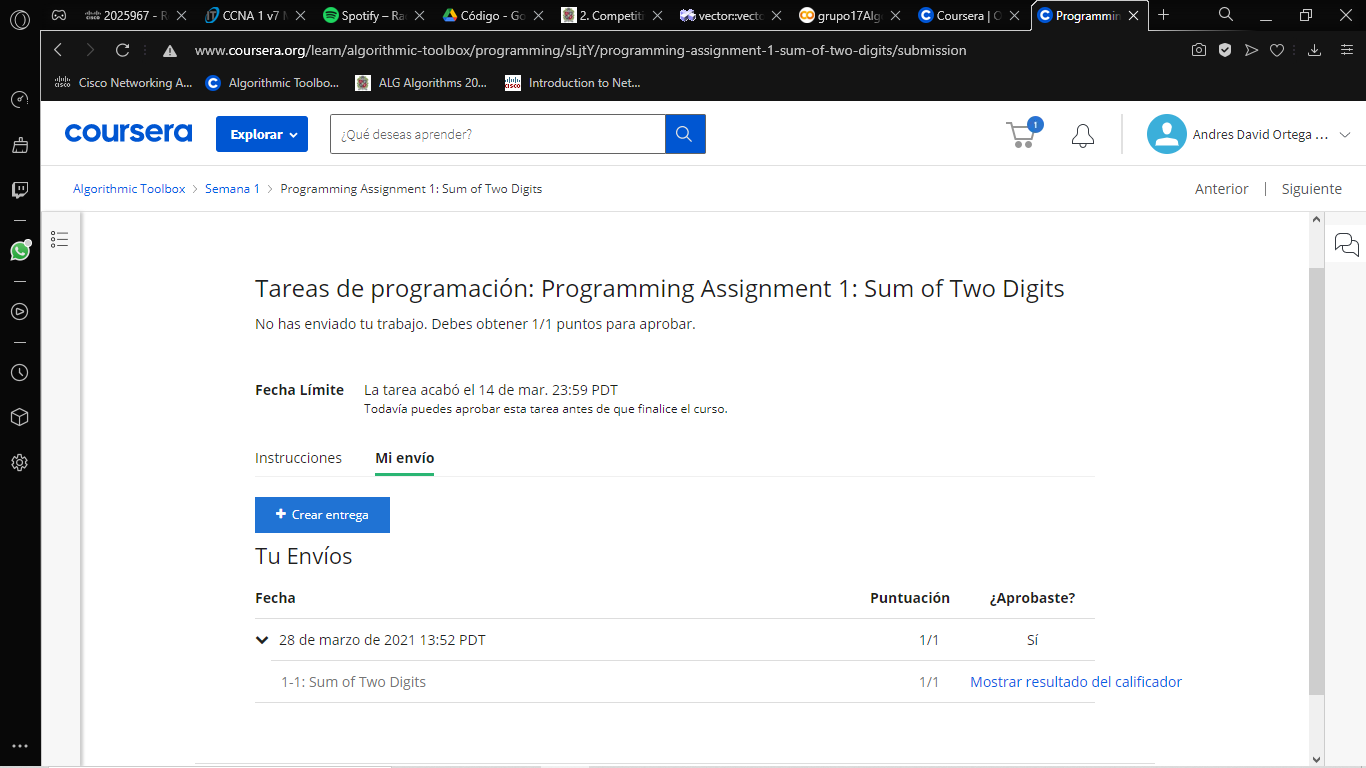

Submit week 1 - Greater Product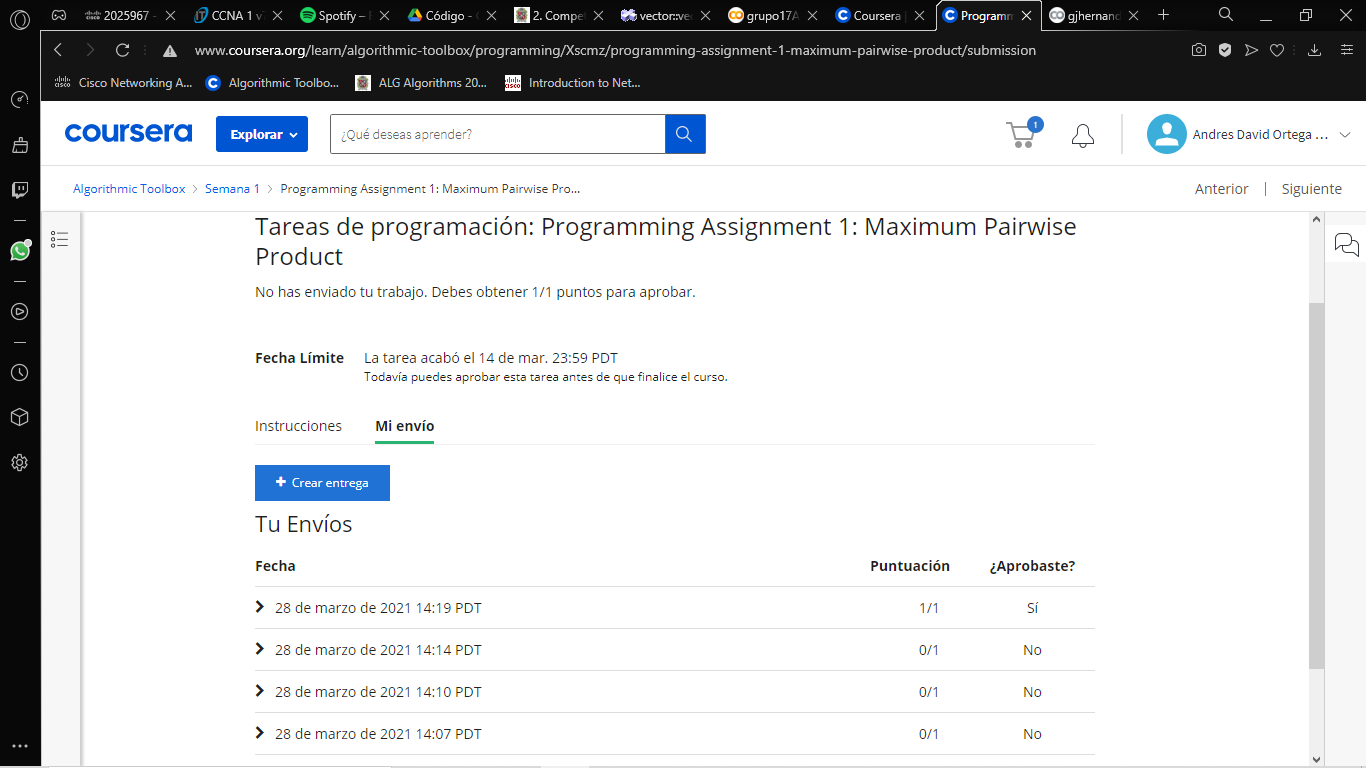